In [1]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#Import CSV file
emission = pd.read_csv("Data Files\emissions_data_clean.csv", encoding="ISO-8859-1")
region = pd.read_csv("Data Files\Clean_Data\Cleaner_Region_Income_data.csv", encoding="ISO-8859-1")
gdp = pd.read_csv("Data Files\clean_gdp_transposed.csv", encoding="ISO-8859-1")

In [20]:
emission_df = emission.rename(columns={"Country/Region":"Country"})
emission_df.head()

,Unnamed: 0,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,3,Russia,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
4,4,Indonesia,1257.1,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,...,1483.61,1125.25,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86


In [21]:
#clean data by dropping the uni columns
#clean data by removing rows with no countries or data (dropNA)
gdp_df1 = gdp.drop(columns="Country Code")
gdp_df = gdp_df1.rename(columns={"Country Name":"Country"})

gdp_df.head()

,Unnamed: 0,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Africa Eastern and Southern,2.121858e+11,2.206075e+11,2.200630e+11,2.338696e+11,2.389192e+11,2.694986e+11,2.682505e+11,2.820139e+11,...,9.427109e+11,9.498491e+11,9.635604e+11,9.837486e+11,9.186471e+11,8.720235e+11,9.842556e+11,1.011723e+12,1.008375e+12,9.188155e+11
1,3,Africa Western and Central,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,1.270639e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.514872e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
2,5,Albania,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
3,7,Arab World,6.225465e+11,4.386821e+11,4.737121e+11,4.826634e+11,5.076597e+11,5.559391e+11,6.140623e+11,6.621761e+11,...,2.491546e+12,2.728988e+12,2.787516e+12,2.818610e+12,2.452006e+12,2.400962e+12,2.455071e+12,2.717933e+12,2.763205e+12,2.436288e+12
4,8,United Arab Emirates,5.070144e+10,5.155217e+10,5.423917e+10,5.562517e+10,5.930509e+10,6.574367e+10,7.357123e+10,7.883901e+10,...,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11,4.172156e+11,3.588688e+11


In [22]:
emission_merge = pd.merge(emission_df, region, how="inner", on="Country")
gdp_merge = pd.merge(gdp_df, region, how="inner", on="Country")
gdp_merge.head()

,Unnamed: 0,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,5,Albania,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,...,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10,Europe & Central Asia,Upper middle income
1,8,United Arab Emirates,5.070144e+10,5.155217e+10,5.423917e+10,5.562517e+10,5.930509e+10,6.574367e+10,7.357123e+10,7.883901e+10,...,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11,4.172156e+11,3.588688e+11,Middle East & North Africa,High income
2,9,Argentina,1.413524e+11,1.897200e+11,2.287886e+11,2.367417e+11,2.574400e+11,2.580318e+11,2.721498e+11,2.928590e+11,...,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.519324e+11,3.892881e+11,Latin America & Caribbean,Upper middle income
3,10,Armenia,2.256839e+09,2.069870e+09,1.272835e+09,1.201313e+09,1.315159e+09,1.468317e+09,1.596969e+09,1.639492e+09,...,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.245794e+10,1.361929e+10,1.264121e+10,Europe & Central Asia,Upper middle income
4,12,Antigua and Barbuda,4.594704e+08,4.817074e+08,4.992815e+08,5.351741e+08,5.894296e+08,5.772815e+08,6.337296e+08,6.806185e+08,...,1.181448e+09,1.249733e+09,1.336693e+09,1.436585e+09,1.467978e+09,1.605944e+09,1.687533e+09,1.370281e+09,Latin America & Caribbean,High income


In [23]:
#emission_complete.to_csv('merged_emissions_region.csv')
print(emission_merge.columns.tolist())

['Unnamed: 0', 'Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', 'Region', 'IncomeGroup']


In [24]:
emission_merge = emission_merge.groupby("IncomeGroup").sum()
emission_merge_clean = emission_merge.drop(columns="Unnamed: 0")
gdp_merge = gdp_merge.groupby("IncomeGroup").sum()
gdp_merge_clean = gdp_merge.drop(columns="Unnamed: 0")
gdp_merge_clean.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,1.858784e+13,1.965767e+13,2.112682e+13,2.127743e+13,2.289962e+13,2.543553e+13,2.563256e+13,2.516749e+13,2.527230e+13,2.655370e+13,...,4.792251e+13,4.798881e+13,4.850554e+13,4.953660e+13,4.682085e+13,4.782170e+13,4.992342e+13,5.307438e+13,5.353433e+13,5.184744e+13
Low income,6.571317e+10,6.508025e+10,5.670395e+10,5.876916e+10,5.014177e+10,5.728970e+10,5.662968e+10,5.950433e+10,5.888036e+10,5.675903e+10,...,2.339238e+11,2.321718e+11,2.520747e+11,2.788278e+11,2.828479e+11,2.821178e+11,3.019644e+11,3.167156e+11,3.339127e+11,3.466741e+11
Lower middle income,8.952116e+11,8.495869e+11,9.081652e+11,9.379134e+11,1.044554e+12,1.194993e+12,1.338269e+12,1.406801e+12,1.349196e+12,1.551013e+12,...,1.285727e+13,5.311932e+12,5.482992e+12,5.803680e+12,5.786662e+12,6.039612e+12,6.475077e+12,6.719467e+12,7.128989e+12,6.862333e+12
Upper middle income,2.553002e+12,2.471331e+12,2.586074e+12,2.837572e+12,3.151162e+12,3.551311e+12,3.857029e+12,4.126731e+12,4.080129e+12,3.855281e+12,...,1.763034e+13,1.889045e+13,2.028444e+13,2.091628e+13,1.968684e+13,1.960626e+13,2.170515e+13,2.337688e+13,2.376224e+13,2.288999e+13


In [25]:
emission_merge_clean.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,13109.52,13098.43,13152.54,13347.07,13507.59,13873.50,14059.77,14105.06,14118.99,14342.48,...,13714.14,14173.10,13787.45,13635.73,13662.90,13525.01,13463.73,13592.55,13573.31,13623.96
Low income,689.86,698.55,703.30,718.56,729.09,723.14,749.16,793.92,802.97,799.95,...,992.36,1033.09,1029.57,1066.68,1086.79,1113.38,1148.30,1221.98,1225.06,1246.05
Lower middle income,5192.32,5178.76,5207.00,5235.25,5346.01,5174.15,6206.40,5482.56,5488.59,5453.72,...,7276.86,7157.07,7813.97,8017.78,8088.86,8690.88,8834.62,8447.37,8640.92,9129.48
Upper middle income,8229.52,8312.75,8547.54,8724.26,9153.65,9290.21,9401.99,9595.45,9432.83,9719.44,...,15429.75,16511.94,15869.59,16311.34,16837.61,16900.29,16874.50,17569.68,17869.98,18167.66


In [26]:
emission_T = emission_merge_clean.transpose()
emission_T = pd.DataFrame(emission_T)
emission_T = emission_T.reset_index()
print(emission_T.columns.tolist())

gdp_T = gdp_merge_clean.transpose()
gdp_T = pd.DataFrame(gdp_T)
gdp_T = gdp_T.reset_index()
print(gdp_T.columns.tolist())


['index', 'High income', 'Low income', 'Lower middle income', 'Upper middle income']
['index', 'High income', 'Low income', 'Lower middle income', 'Upper middle income']


Text(0, 0.5, 'MTCO2e')

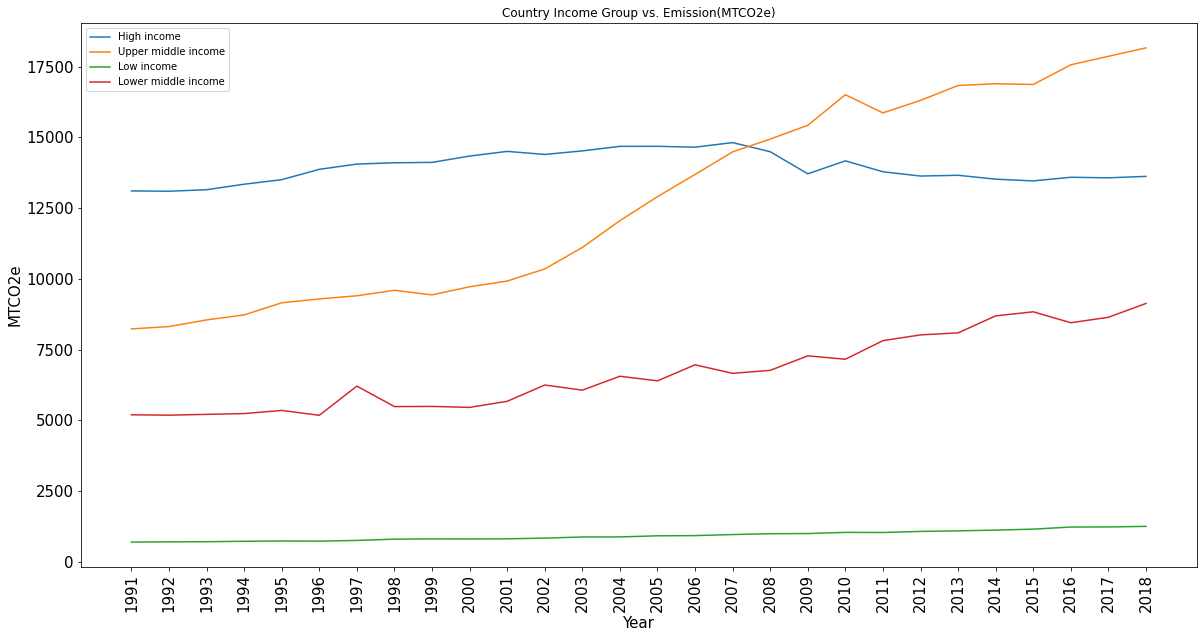

In [27]:
#Metric tons of carbon dioxide equivalent or MTCO2e is the unit of measurement in this tool. 
#The unit "CO2e" represents an amount of a GHG whose atmospheric impact has been standardized to that of one unit 
#mass of carbon dioxide (CO2), based on the global warming potential (GWP) of the gas.
plt.figure(figsize=(20,10))
plt.plot(emission_T["index"], emission_T["High income"], label="High income")
plt.plot(emission_T["index"], emission_T["Upper middle income"], label="Upper middle income")
plt.plot(emission_T["index"], emission_T["Low income"], label="Low income")
plt.plot(emission_T["index"], emission_T["Lower middle income"], label="Lower middle income")
plt.title("Country Income Group vs. Emission(MTCO2e)")
plt.legend()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.xlabel("Year" , fontsize=15)
plt.ylabel("MTCO2e", fontsize=15)

Text(0, 0.5, 'Trillions ($USD)')

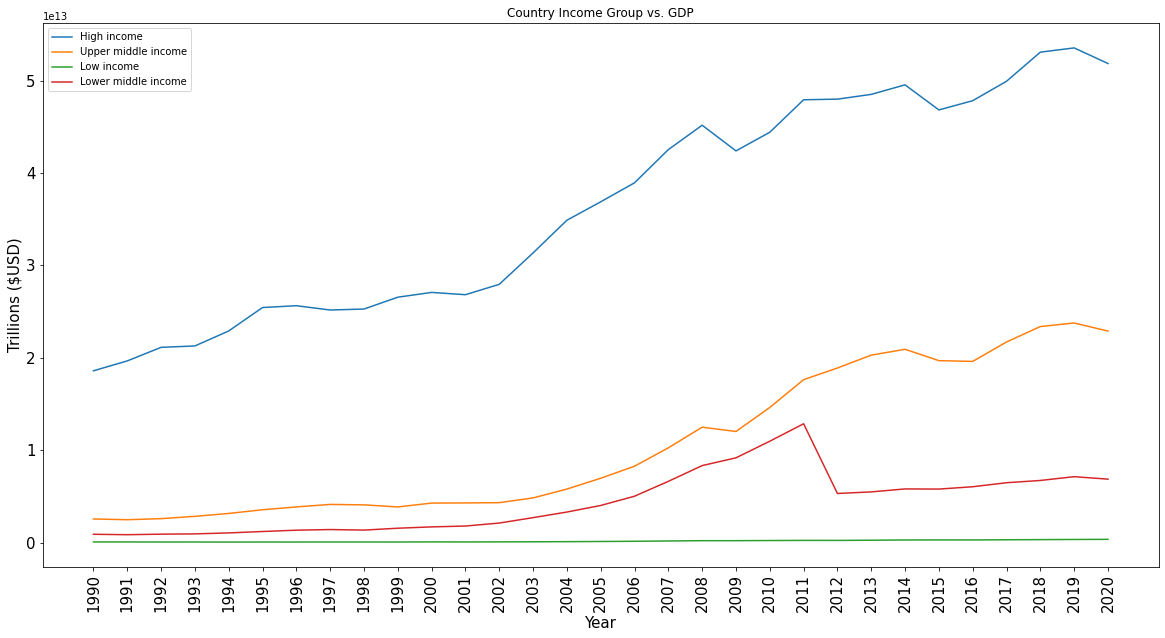

In [28]:
plt.figure(figsize=(20,10))
plt.plot(gdp_T["index"], gdp_T["High income"], label="High income")
plt.plot(gdp_T["index"], gdp_T["Upper middle income"], label="Upper middle income")
plt.plot(gdp_T["index"], gdp_T["Low income"], label="Low income")
plt.plot(gdp_T["index"], gdp_T["Lower middle income"], label="Lower middle income")
plt.title("Country Income Group vs. GDP")
plt.legend()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.xlabel("Year" , fontsize=15)
plt.ylabel("Trillions ($USD)", fontsize=15)